# 서울 거래 활발 지수
- iloc[7]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [12]:
df = pd.read_excel('../data/added_features/월간 매매거래활발지수.xlsx')

In [13]:
df.head(10)

,지역,구분,2003-07-01 09:00:52,2003-08-01 09:00:52,2003-09-01 09:00:52,2003-10-01 09:00:52,2003-11-01 09:00:52,2003-12-01 09:00:52,2004-01-01 09:00:52,2004-02-01 09:00:52,...,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52,2024-04-01 09:00:52,2024-05-01 09:00:52,2024-06-01 09:00:52
0,전국,활발함,0.563412,1.263687,2.994573,1.734427,0.309414,0.089059,0.450992,1.354802,...,0.672625,0.254082,0.099127,0.051183,0.201046,0.204551,0.413378,0.369425,0.200056,0.805612
1,전국,보통,14.961718,19.491645,28.211301,24.936127,7.699407,5.124889,7.748508,18.087859,...,15.793956,11.985052,7.168064,4.932534,5.992528,7.062691,9.555082,10.374620,9.414614,13.403207
2,전국,한산함,84.47487,79.243802,68.794126,73.329446,91.991179,94.786052,91.8005,80.557339,...,83.533420,87.760866,92.732809,95.016282,93.806426,92.732758,90.031540,89.255954,90.385331,85.791180
3,전국,매매거래지수,16.088542,22.019885,34.200448,28.404981,8.318234,5.303008,8.650492,20.797463,...,17.139205,12.493216,7.366318,5.034901,6.394619,7.471794,10.381838,11.113471,9.814725,15.014432
4,서울,활발함,0.47596,1.435374,2.579353,0.635622,0,0,0.16858,1.01659,...,0.670181,0.062608,0.105902,0.093145,0.178379,0.109131,0.222872,0.697806,0.665797,2.345007
5,서울,보통,13.230849,22.029092,29.496179,19.563749,2.489521,1.89093,3.288026,16.203727,...,15.947255,10.165437,4.369447,3.524535,3.974322,4.956123,7.291481,12.710977,13.145510,21.175273
6,서울,한산함,86.293191,76.530524,67.924468,79.800629,97.510479,98.10907,96.543394,82.779683,...,83.382564,89.771955,95.524651,96.382320,95.847299,94.934746,92.485647,86.591217,86.188693,76.479720
7,서울,매매거래지수,14.182769,24.90485,34.654885,20.834993,2.489521,1.89093,3.625186,18.236907,...,17.287617,10.290654,4.581252,3.710825,4.331080,5.174386,7.737224,14.106590,14.477103,25.865287
8,강북14개구,활발함,0,1.25,2.9,0.295035,0,0,0.3417,1.128129,...,0.919657,0.000000,0.000000,0.196406,0.135320,0.104949,0.104092,0.976341,0.555967,2.523353
9,강북14개구,보통,12.81,20,33.87,22.897113,3.865885,2.566251,4.850354,19.226846,...,20.730395,11.111071,5.035823,4.091262,3.412349,4.367297,6.585492,12.016971,13.029113,20.124323


In [14]:
df.drop(['지역', '구분'], axis=1, inplace=True)

In [15]:
df

,2003-07-01 09:00:52,2003-08-01 09:00:52,2003-09-01 09:00:52,2003-10-01 09:00:52,2003-11-01 09:00:52,2003-12-01 09:00:52,2004-01-01 09:00:52,2004-02-01 09:00:52,2004-03-01 09:00:52,2004-04-01 09:00:52,...,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52,2024-04-01 09:00:52,2024-05-01 09:00:52,2024-06-01 09:00:52
0,0.563412,1.263687,2.994573,1.734427,0.309414,0.089059,0.450992,1.354802,0.592512,0.424233,...,0.672625,0.254082,0.099127,0.051183,0.201046,0.204551,0.413378,0.369425,0.200056,0.805612
1,14.961718,19.491645,28.211301,24.936127,7.699407,5.124889,7.748508,18.087859,17.283117,16.71395,...,15.793956,11.985052,7.168064,4.932534,5.992528,7.062691,9.555082,10.374620,9.414614,13.403207
2,84.47487,79.243802,68.794126,73.329446,91.991179,94.786052,91.8005,80.557339,82.124371,82.861817,...,83.533420,87.760866,92.732809,95.016282,93.806426,92.732758,90.031540,89.255954,90.385331,85.791180
3,16.088542,22.019885,34.200448,28.404981,8.318234,5.303008,8.650492,20.797463,18.46814,17.562416,...,17.139205,12.493216,7.366318,5.034901,6.394619,7.471794,10.381838,11.113471,9.814725,15.014432
4,0.47596,1.435374,2.579353,0.635622,0,0,0.16858,1.01659,0.547705,0.526299,...,0.670181,0.062608,0.105902,0.093145,0.178379,0.109131,0.222872,0.697806,0.665797,2.345007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-,-,-,-,-,-,-,-,-,-,...,14.247115,13.576066,7.279741,5.520943,13.184984,9.077229,9.629355,9.532302,9.707954,11.155406
92,-,-,-,-,-,-,-,-,-,-,...,0.000000,0.000000,0.000000,0.000000,0.622629,0.000000,0.000000,0.680386,0.000000,0.000000
93,-,-,-,-,-,-,-,-,-,-,...,17.349569,13.215009,5.012569,5.989992,8.148452,5.646416,13.604315,11.160350,11.509082,12.718682
94,-,-,-,-,-,-,-,-,-,-,...,82.650431,86.784991,94.987431,94.010008,91.228919,94.353584,86.395685,88.159263,88.490918,87.281318


In [16]:
cols = df.columns
cols = [int(str(col)[:10].replace('-', '')[:6]) for col in cols]
cols

[200307,
 200308,
 200309,
 200310,
 200311,
 200312,
 200401,
 200402,
 200403,
 200404,
 200405,
 200406,
 200407,
 200408,
 200409,
 200410,
 200411,
 200412,
 200501,
 200502,
 200503,
 200504,
 200505,
 200506,
 200507,
 200508,
 200509,
 200510,
 200511,
 200512,
 200601,
 200602,
 200603,
 200604,
 200605,
 200606,
 200607,
 200608,
 200609,
 200610,
 200611,
 200612,
 200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 200809,
 200810,
 200811,
 200812,
 200901,
 200902,
 200903,
 200904,
 200905,
 200906,
 200907,
 200908,
 200909,
 200910,
 200911,
 200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 

In [17]:
df.columns = cols
df

,200307,200308,200309,200310,200311,200312,200401,200402,200403,200404,...,202309,202310,202311,202312,202401,202402,202403,202404,202405,202406
0,0.563412,1.263687,2.994573,1.734427,0.309414,0.089059,0.450992,1.354802,0.592512,0.424233,...,0.672625,0.254082,0.099127,0.051183,0.201046,0.204551,0.413378,0.369425,0.200056,0.805612
1,14.961718,19.491645,28.211301,24.936127,7.699407,5.124889,7.748508,18.087859,17.283117,16.71395,...,15.793956,11.985052,7.168064,4.932534,5.992528,7.062691,9.555082,10.374620,9.414614,13.403207
2,84.47487,79.243802,68.794126,73.329446,91.991179,94.786052,91.8005,80.557339,82.124371,82.861817,...,83.533420,87.760866,92.732809,95.016282,93.806426,92.732758,90.031540,89.255954,90.385331,85.791180
3,16.088542,22.019885,34.200448,28.404981,8.318234,5.303008,8.650492,20.797463,18.46814,17.562416,...,17.139205,12.493216,7.366318,5.034901,6.394619,7.471794,10.381838,11.113471,9.814725,15.014432
4,0.47596,1.435374,2.579353,0.635622,0,0,0.16858,1.01659,0.547705,0.526299,...,0.670181,0.062608,0.105902,0.093145,0.178379,0.109131,0.222872,0.697806,0.665797,2.345007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-,-,-,-,-,-,-,-,-,-,...,14.247115,13.576066,7.279741,5.520943,13.184984,9.077229,9.629355,9.532302,9.707954,11.155406
92,-,-,-,-,-,-,-,-,-,-,...,0.000000,0.000000,0.000000,0.000000,0.622629,0.000000,0.000000,0.680386,0.000000,0.000000
93,-,-,-,-,-,-,-,-,-,-,...,17.349569,13.215009,5.012569,5.989992,8.148452,5.646416,13.604315,11.160350,11.509082,12.718682
94,-,-,-,-,-,-,-,-,-,-,...,82.650431,86.784991,94.987431,94.010008,91.228919,94.353584,86.395685,88.159263,88.490918,87.281318


In [18]:
df = pd.DataFrame(df.iloc[7])
df.reset_index(inplace=True)
df.columns = ['년도월', '거래활발지수']
df

,년도월,거래활발지수
0,200307,14.182769
1,200308,24.90485
2,200309,34.654885
3,200310,20.834993
4,200311,2.489521
...,...,...
247,202402,5.174386
248,202403,7.737224
249,202404,14.10659
250,202405,14.477103


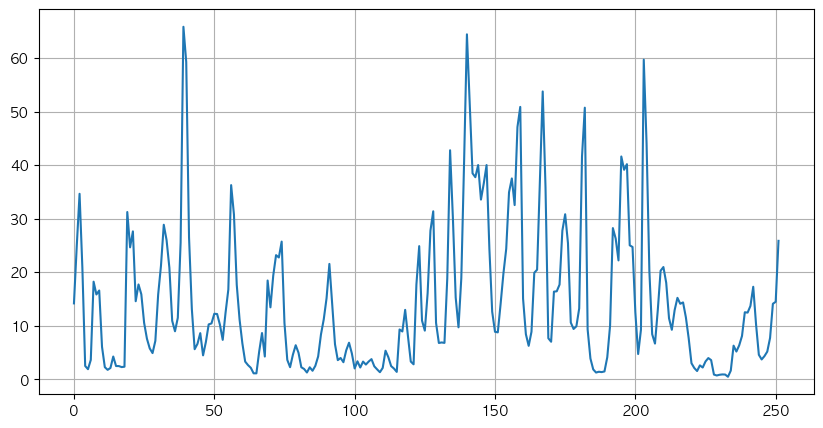

In [23]:
plt.figure(figsize=(10, 5))
df['거래활발지수'].plot()
plt.grid(True)
plt.show()

# 원본에 적용

In [24]:
origin_df = pd.read_csv('../data/preprocessed/17_purchasing_power_parity.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_17646/1624947766.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_df = pd.read_csv('../data/preprocessed/17_purchasing_power_parity.csv')


In [25]:
origin_df['계약년월']

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1128089    202307
1128090    202307
1128091    202308
1128092    202309
1128093    202309
Name: 계약년월, Length: 1128094, dtype: int64

In [26]:
ta_mapping = pd.Series({ym: value for ym, value in zip(df['년도월'], df['거래활발지수'])})

origin_df['거래활발지수'] = np.nan
origin_df['거래활발지수'] = origin_df['거래활발지수'].fillna(origin_df['계약년월']).map(ta_mapping)

In [27]:
origin_df[['거래활발지수']].isna().sum()

거래활발지수    0
dtype: int64

In [28]:
origin_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,1.0,중랑구,신내동,99.123,2.963517e+06,46.0,9,0,45.056635,13.703570
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,1.0,중랑구,신내동,99.328,2.963517e+06,41.4,9,0,44.744578,17.287617


In [29]:
origin_df.to_csv('../data/preprocessed/18_trading_activity.csv', index=False)